<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 14 . Trees and Forests

Problem
You need to train a classifier using a decision tree.

In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)

Decision tree learners attempt to find a decision rule that produces the greatest
decrease in impurity at a node. While there are a number of measurements of impurity,
by default DecisionTreeClassifier uses Gini impurity:

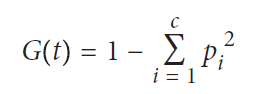

where G(t) is the Gini impurity at node t and pi is the proportion of observations of
class c at node t.



In [5]:
#Finally, if we want to use a different impurity measurement we can use the criterion parameter:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(
    criterion='entropy', random_state=0)
# Train model using the descision tree entropy as seen above passed as a function
model_entropy = decisiontree_entropy.fit(features, target)

Problem
You need to train a regression model using a decision tree.

In [6]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target
# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)
# Train model
model = decisiontree.fit(features, target)

Decision tree regression works similarly to decision tree classification; however,
instead of reducing Gini impurity or entropy, potential splits are by default measured
on how much they reduce mean squared error (MSE):

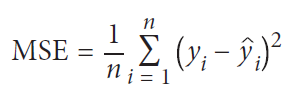





Just like with DecisionTreeClassifier we can use the criterion parameter to select
the desired measurement of split quality. For example, we can construct a tree whose
splits reduce mean absolute error (MAE):

In [7]:
# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
# Train model
model_mae = decisiontree_mae.fit(features, target)

Selecting root for DT.

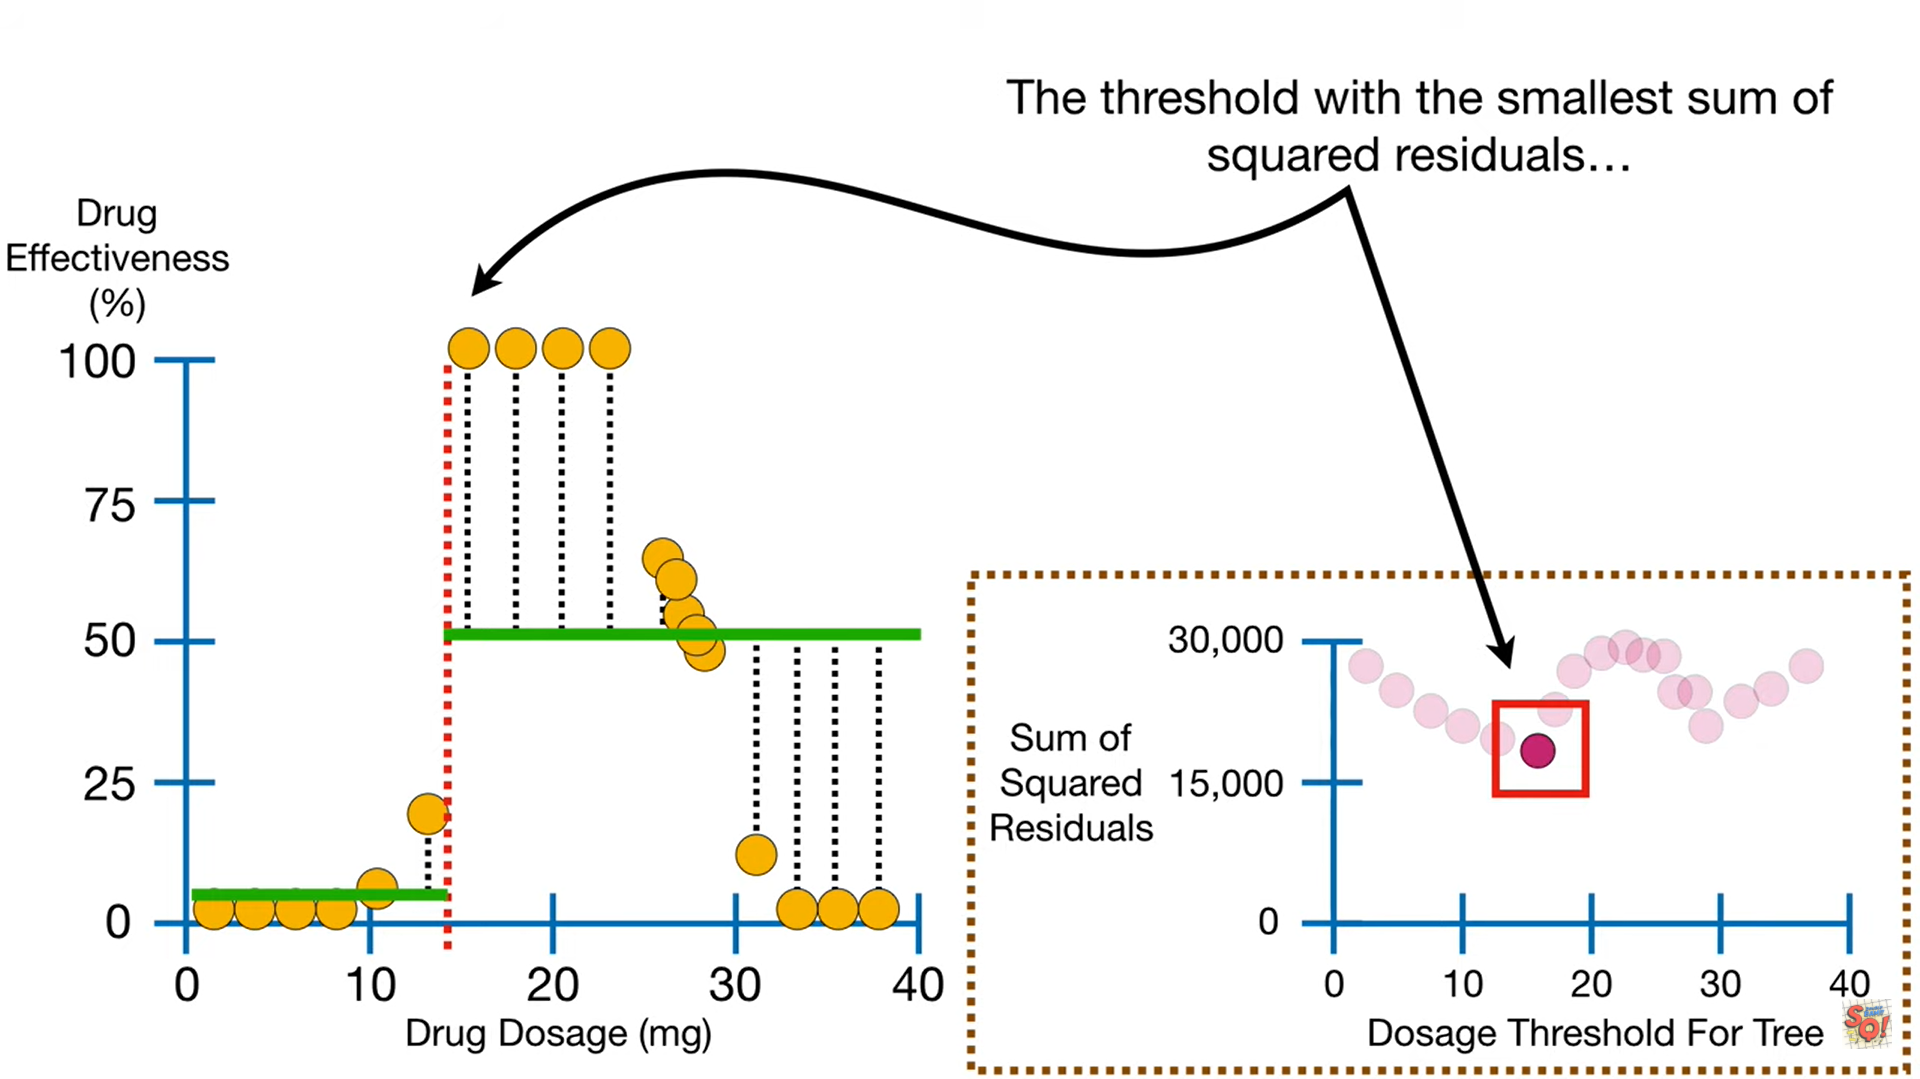


Problem
You need to visualize a model created by a decision tree learning algorithm.

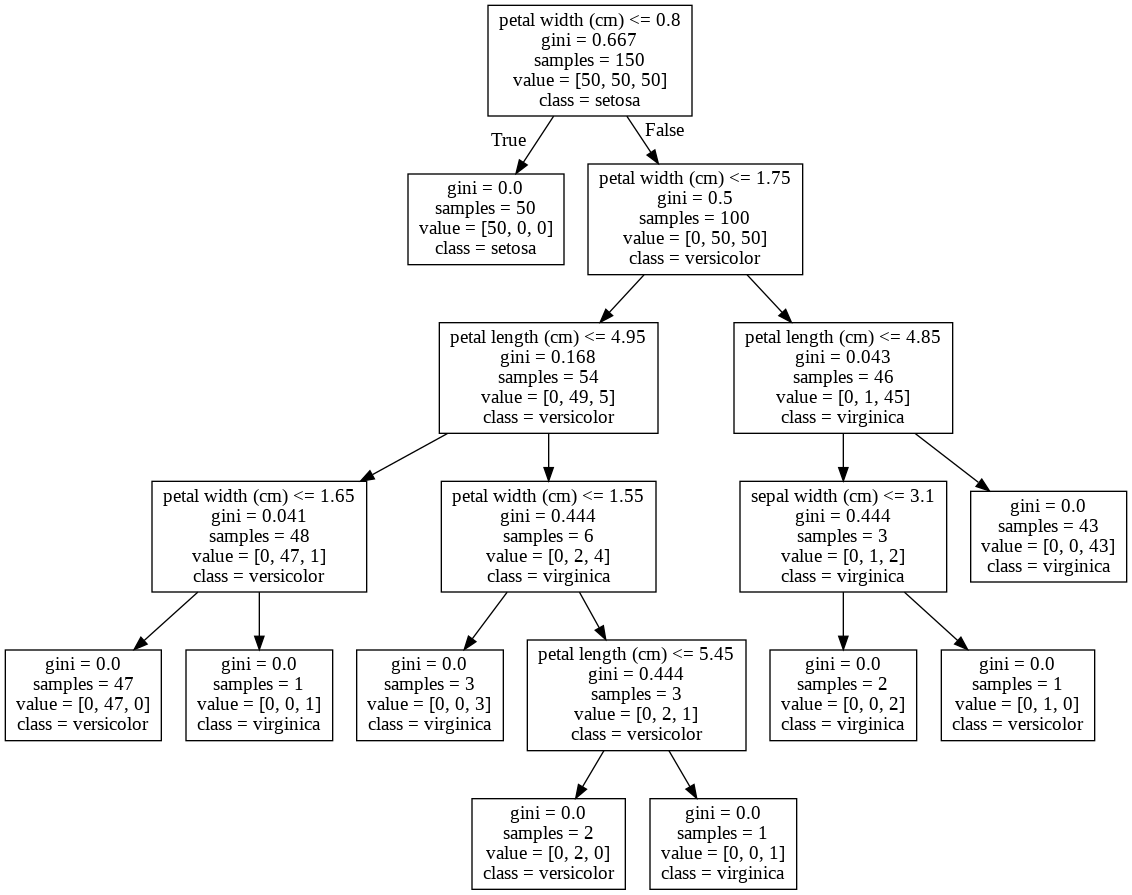

In [8]:
# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

Problem
You want to train a classification model using a “forest” of randomized decision trees.

In [9]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

A common problem with decision trees is that they tend to fit the training data too
closely (i.e., overfitting). This has motivated the widespread use of an ensemble learning
method called random forest. In a random forest, many decision trees are trained,
but each tree only receives a bootstrapped sample of observations (i.e., a random
sample of observations with replacement that matches the original number of observations)
and each node only considers a subset of features when determining the best
split. This forest of randomized decision trees (hence the name) votes to determine
the predicted class.

Problem
You want to train a regression model using a “forest” of randomized decision trees.

In [10]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

As with Random
ForestClassifier we have certain important parameters:

• max_features sets the maximum number of features to consider at each node.
Defaults to p features, where p is the total number of features.


• bootstrap sets whether or not to sample with replacement. Defaults to True.


• n_estimators sets the number of decision trees to construct. Defaults to 10.

Problem
You need to know which features are most important in a random forest model.

In [12]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

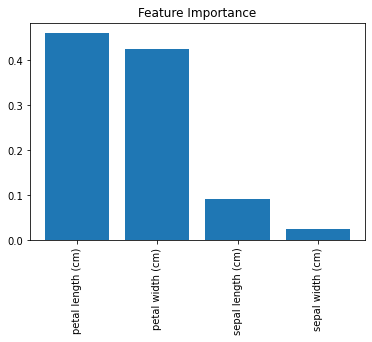

In [13]:
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# Show plot
plt.show()

One of the major benefits of decision trees is interpretability. Specifically, we can visualize
the entire model. However, a random forest model is comprised
of tens, hundreds, even thousands of decision trees. This makes a simple, intuitive
visualization of a random forest model impractical. That said, there is another
option: we can compare (and visualize) the relative importance of each feature

However, there are two things to keep in mind regarding feature importance. First,
scikit-learn requires that we break up nominal categorical features into multiple
binary features. This has the effect of spreading the importance of that feature across
all of the binary features and can often make each feature appear to be unimportant
even when the original nominal categorical feature is highly important. Second, if two
features are highly correlated, one feature will claim much of the importance, making
the other feature appear to be far less important—which has implications for interpretation
if not considered.

Problem
You need to conduct feature selection on a random forest.

In [14]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)
# Train random forest using most important featres
model = randomforest.fit(features_important, target)

In scikit-learn we can use a simple two-stage workflow to create a model with
reduced features. First, we train a random forest model using all features. Then, we
use this model to identify the most important features. Next, we create a new feature
matrix that includes only these features. In our solution, we used the SelectFromMo
del method to create a feature matrix containing only features with an importance
greater than or equal to some threshold value. Finally, we created a new model using
only those features.

Problem
You have a target vector with highly imbalanced classes and want to train a random
forest model.

In [15]:
# Load libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Create random forest classifier object
randomforest = RandomForestClassifier(
random_state=0, n_jobs=-1, class_weight="balanced")
# Train model
model = randomforest.fit(features, target)

Imbalanced classes are a common problem when we are doing machine learning in
the real world. We can set RandomForestClassifier to correct for imbalanced classes using
the class_weight parameter. If supplied with a dictionary in the form of class names
and respective desired weights (e.g., {"male": 0.2, "female": 0.8}), RandomFor
estClassifier will weight the classes accordingly.

However, often a more useful
argument is balanced, wherein classes are automatically weighted inversely proportional
to how frequently they appear in the data:

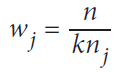

wj is the weight to class j, n is the number of observations, nj is the number of
observations in class j, and k is the total number of classes.


Problem
You want to manually determine the structure and size of a decision tree.

In [17]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0,
max_leaf_nodes=None,
min_impurity_decrease=0)
# Train model
model = decisiontree.fit(features, target)

##**Parameter Description***


max_depth
Maximum depth of the tree. If None, the tree is grown until all leaves are pure. If
an integer, the tree is effectively “pruned” to that depth.

min_samples_split
Minimum number of observations at a node before that node is split. If an integer
is supplied as an argument it determines the raw minimum, while if a float is
supplied the minimum is the percent of total observations.

min_samples_leaf
Minimum number of observations required to be at a leaf. Uses the same arguments
as min_samples_split.

max_leaf_nodes
Maximum number of leaves.

min_impurity_split
Minimum impurity decrease required before a split is performed.

While it is useful to know these parameters exist, most likely we will only be using
max_depth and min_impurity_split because shallower trees (sometimes called
stumps) are simpler models and thus have lower variance.

Problem
You need a model with better performance than decision trees or random forests.

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)
# Train model
model = adaboost.fit(features, target)

In random forest, an ensemble (group) of randomized decision trees predicts the target
vector. An alternative, and often more powerful, approach is called boosting. In
one form of boosting called AdaBoost, we iteratively train a series of weak models
(most often a shallow decision tree, sometimes called a stump), each iteration giving
higher priority to observations the previous model predicted incorrectly. More specifically,
in AdaBoost.

The most important
parameters are base_estimator, n_estimators, and learning_rate:

base_estimator is the learning algorithm to use to train the weak models. This
will almost always not need to be changed because by far the most common
learner to use with AdaBoost is a decision tree—the parameter’s default argument.

n_estimators is the number of models to iteratively train.

learning_rate is the contribution of each model to the weights and defaults to 1
Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model to train slower (but sometimes resulting in
better performance scores).

loss is exclusive to AdaBoostRegressor and sets the loss function to use when
updating weights. This defaults to a linear loss function, but can be changed to
square or exponential.



Problem
You need to evaluate a random forest model without using cross-validation.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random tree classifier object
randomforest = RandomForestClassifier(
random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334

We can
use OOB observations as a test set to evaluate the performance of our random forest.

For every observation, the learning algorithm compares the observation’s true value
with the prediction from a subset of trees not trained using that observation. The
overall score is calculated and provides a single measure of a random forest’s performance.
OOB score estimation is an alternative to cross-validation.